In [33]:
import json
import shutil, os
from ops import generate_patches
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle
import tqdm
import random
from tensorflow.keras.utils import to_categorical


In [2]:
#load the params-patches.json options
with open(os.path.join('v1', 'params-patches.json')) as param_file:
    params_patches = json.load(param_file)

#load the params-models.json options
with open(os.path.join('v1', 'params-model.json')) as param_file:
    params_model = json.load(param_file)

In [3]:
tiles_path = params_patches['tiles_path']
patches_path = params_patches['patches_path']

train_path = os.path.join(patches_path, params_patches['train_sub'])
val_path = os.path.join(patches_path, params_patches['val_sub'])
test_path = os.path.join(patches_path, params_patches['test_sub'])

In [55]:
def remove_sub(text):
    return text.split('.')[0][6:]

## Training test

In [13]:
data = list(map(remove_sub,os.listdir(os.path.join(train_path, params_patches['label_sub']))))
random.shuffle(data)
for d in data[:10]:
    opt = np.load(os.path.join(train_path, params_patches['data_sub'], f'opt_{d}.npy'))

    sar = np.load(os.path.join(train_path, params_patches['data_sub'], f'sar_{d}.npy'))
    label = np.load(os.path.join(train_path, params_patches['label_sub'], f'label_{d}.npy'))
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (25,10))

    img = Image.fromarray(np.uint8(opt[:, :, 1:4]*255))
    ax[0].axis('off')
    ax[0].set_title('OPT')
    ax[0].imshow(img)

    img = Image.fromarray(np.uint8(opt[:, :, 5:8]*255))
    ax[1].axis('off')
    ax[1].set_title('OPT')
    ax[1].imshow(img)

    img = Image.fromarray(np.uint8(sar[:, :, 0]*255))
    ax[2].axis('off')
    ax[2].set_title('SAR')
    ax[2].imshow(img, cmap='gray')

    img = Image.fromarray(np.uint8(sar[:, :, 2]*255))
    ax[3].axis('off')
    ax[3].set_title('SAR')
    ax[3].imshow(img, cmap='gray')

    categorical = to_categorical(label, params_model['classes'])
    img = Image.fromarray(np.uint8(categorical*255))
    ax[4].axis('off')
    ax[4].set_title('LABEL')
    ax[4].imshow(img)


## Validation test

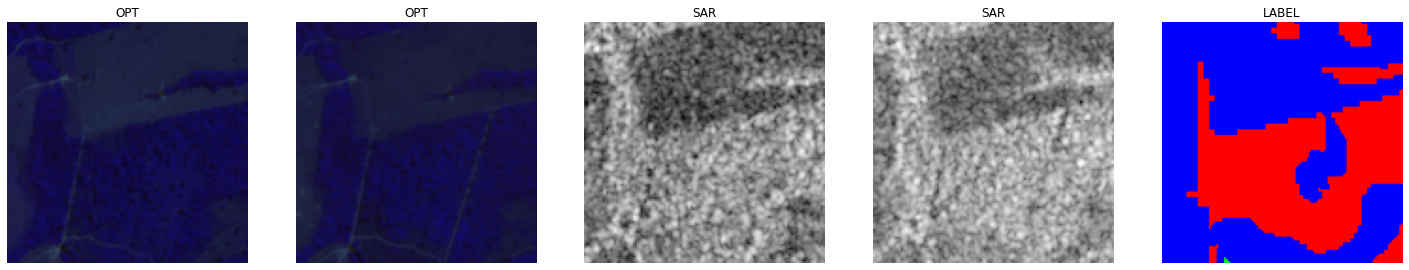

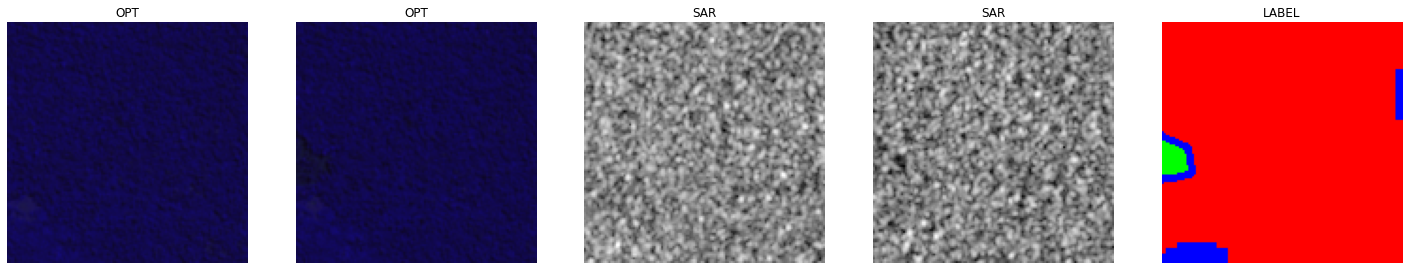

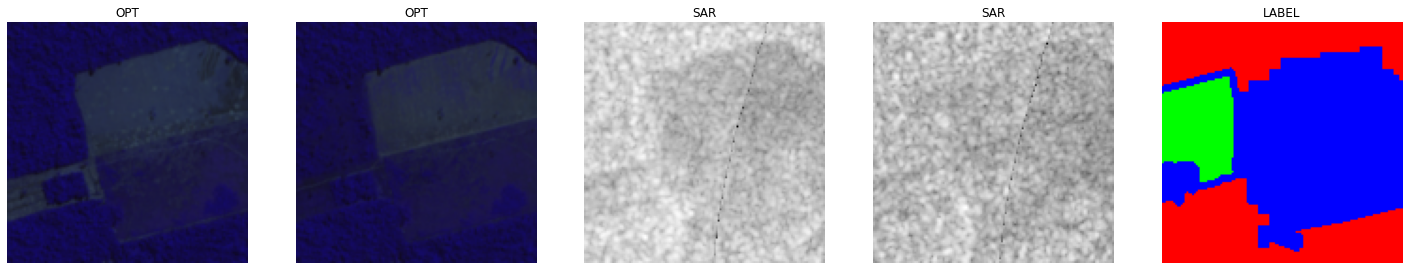

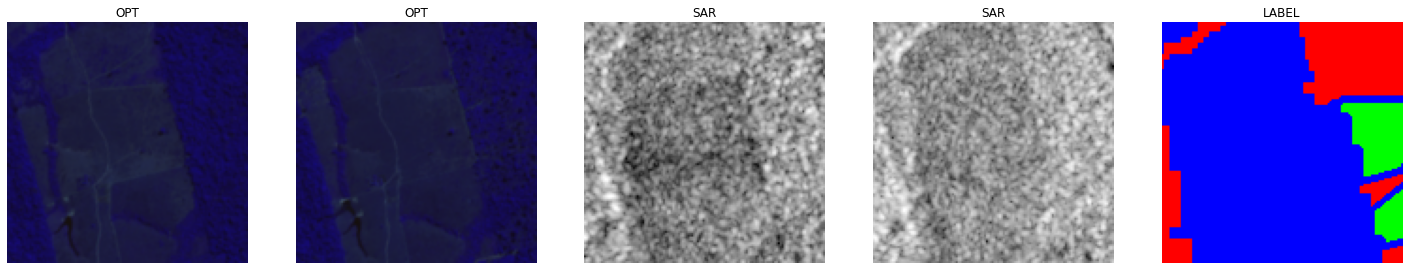

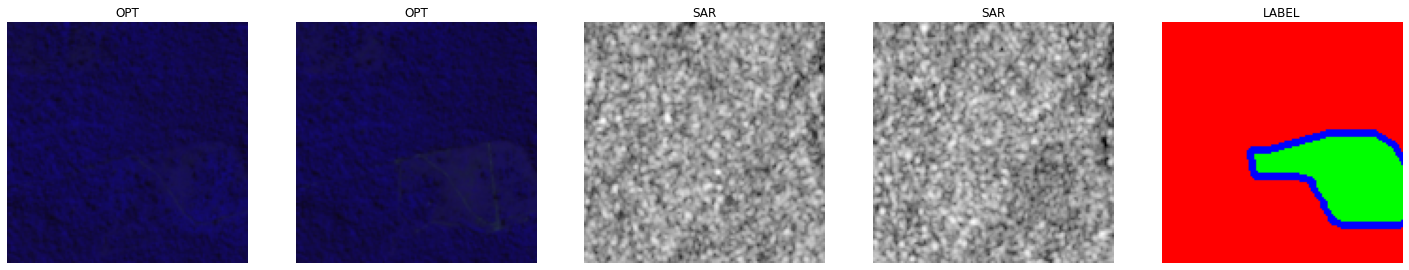

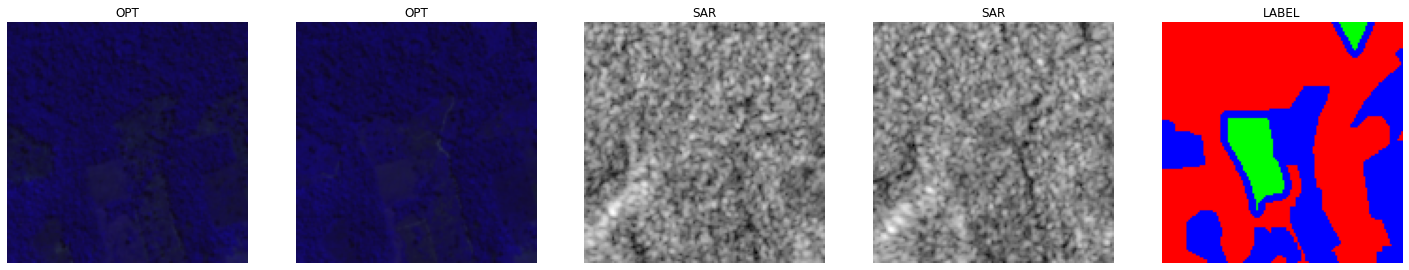

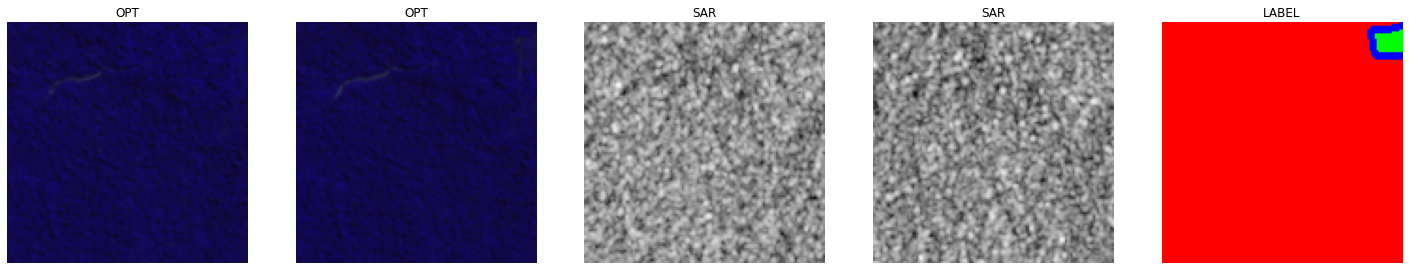

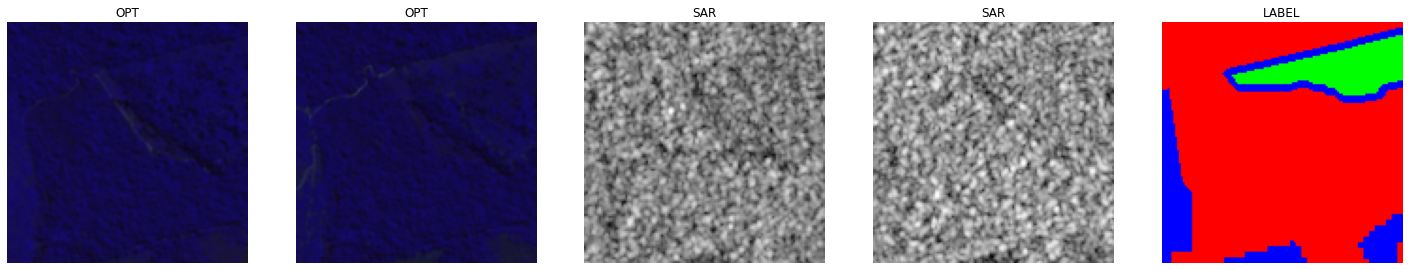

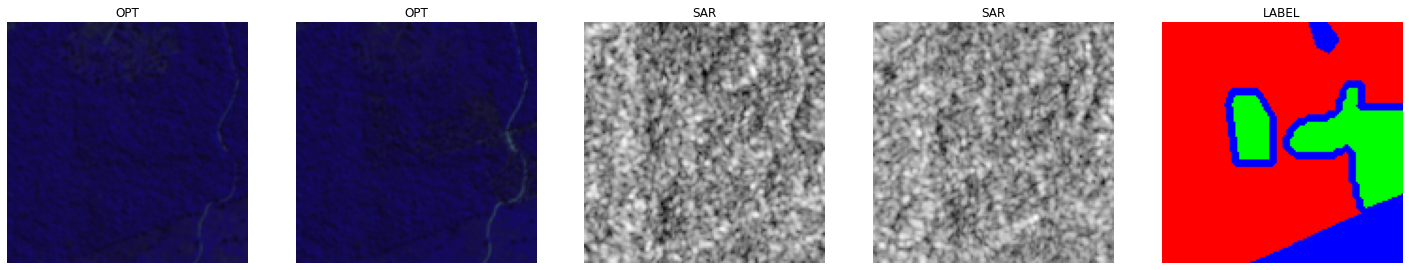

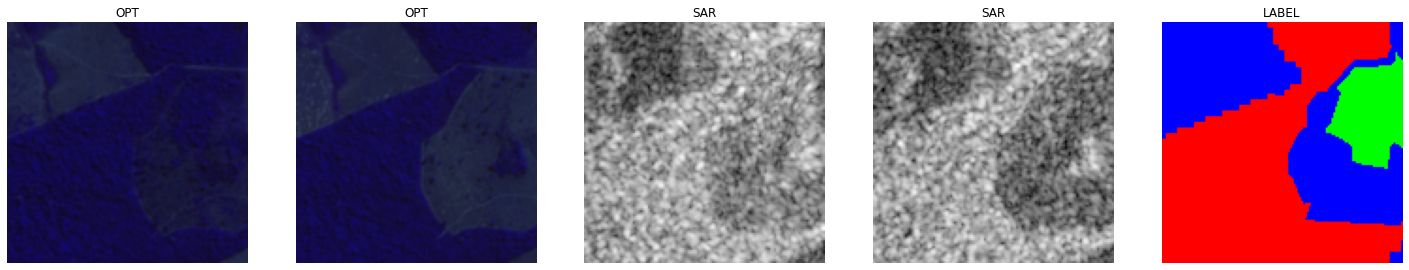

In [56]:
data = list(map(remove_sub,os.listdir(os.path.join(val_path, params_patches['label_sub']))))
random.shuffle(data)
for d in data[:10]:
    opt = np.load(os.path.join(val_path, params_patches['data_sub'], f'opt_{d}.npy'))

    sar = np.load(os.path.join(val_path, params_patches['data_sub'], f'sar_{d}.npy'))
    label = np.load(os.path.join(val_path, params_patches['label_sub'], f'label_{d}.npy'))
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (25,10))

    img = Image.fromarray(np.uint8(opt[:, :, 1:4]*255))
    ax[0].axis('off')
    ax[0].set_title('OPT')
    ax[0].imshow(img)

    img = Image.fromarray(np.uint8(opt[:, :, 5:8]*255))
    ax[1].axis('off')
    ax[1].set_title('OPT')
    ax[1].imshow(img)

    img = Image.fromarray(np.uint8(sar[:, :, 0]*255))
    ax[2].axis('off')
    ax[2].set_title('SAR')
    ax[2].imshow(img, cmap='gray')

    img = Image.fromarray(np.uint8(sar[:, :, 2]*255))
    ax[3].axis('off')
    ax[3].set_title('SAR')
    ax[3].imshow(img, cmap='gray')

    categorical = to_categorical(label, params_model['classes'])
    img = Image.fromarray(np.uint8(categorical*255))
    ax[4].axis('off')
    ax[4].set_title('LABEL')
    ax[4].imshow(img)
